아이리스 데이터를 활용하여 실습

패키지

In [32]:
import pandas as pd
import numpy as np
import shap
import transformers

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from lime import lime_tabular

In [33]:
shap.initjs()

데이터셋

In [34]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
X = pd.DataFrame(iris_data.data, columns=iris_data["feature_names"])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, iris_data.target, test_size=0.2, random_state=12345
)

In [58]:
rfr = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=3)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=12345)

In [59]:
type(X_train)

pandas.core.frame.DataFrame

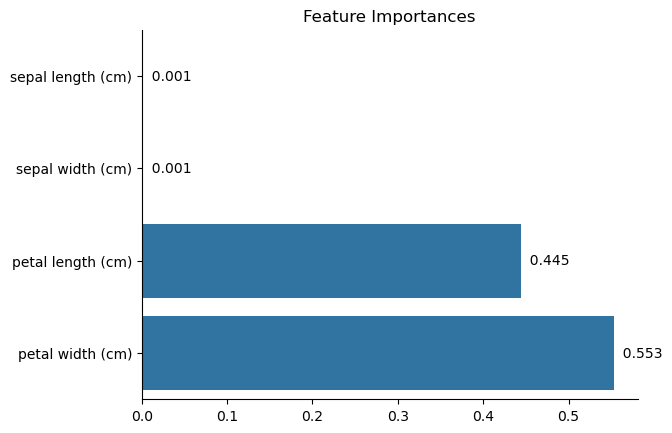

In [60]:
ax = sns.barplot(x=rfr.feature_importances_, y=iris_data.feature_names)
ax.bar_label(ax.containers[0], fmt="  %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("Feature Importances")
plt.show()

In [61]:
explainer = shap.TreeExplainer(rfr)
explainer

In [62]:
shap_train = explainer.shap_values(X_train)
shap_test = explainer.shap_values(X_test)

shap_train

array([[ 1.31547619e-03, -4.04761905e-04, -4.87429219e-01,
        -5.52648161e-01],
       [ 1.31547619e-03, -4.04761905e-04, -4.87429219e-01,
        -5.52648161e-01],
       [ 1.31807493e-04, -4.04761905e-04,  4.04180359e-01,
         5.56925929e-01],
       [ 1.31807493e-04, -4.04761905e-04,  3.16039845e-01,
         6.45066443e-01],
       [ 4.36581423e-04,  3.00563063e-02,  1.30728413e-01,
        -1.41921445e-01],
       [-8.36205975e-04, -4.04761905e-04,  4.38687016e-01,
         5.23387285e-01],
       [ 1.31807493e-04, -4.04761905e-04,  4.38960585e-01,
         5.22145703e-01],
       [ 4.36581423e-04, -1.71750322e-03,  1.30728413e-01,
        -1.58719064e-01],
       [ 1.31547619e-03, -4.04761905e-04, -4.87429219e-01,
        -5.52648161e-01],
       [ 4.36581423e-04, -1.71750322e-03,  1.30728413e-01,
        -1.58719064e-01],
       [ 8.66666667e-03, -4.04761905e-04, -4.96328029e-01,
        -5.51100542e-01],
       [ 4.36581423e-04, -1.71750322e-03,  1.30728413e-01,
      

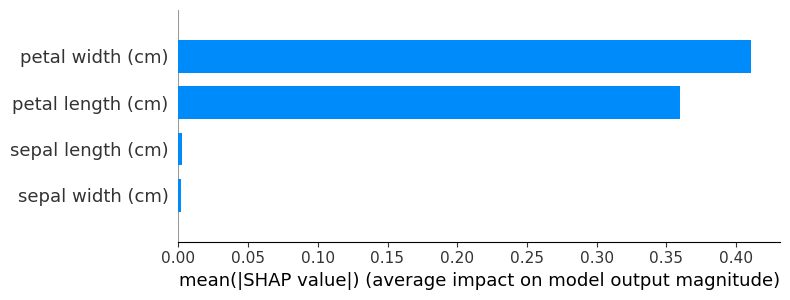

In [63]:
shap.summary_plot(shap_train, X_train, plot_type="bar")

In [64]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
19,5.1,3.8,1.5,0.3
48,5.3,3.7,1.5,0.2
146,6.3,2.5,5.0,1.9
121,5.6,2.8,4.9,2.0
60,5.0,2.0,3.5,1.0
...,...,...,...,...
34,4.9,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
126,6.2,2.8,4.8,1.8
129,7.2,3.0,5.8,1.6


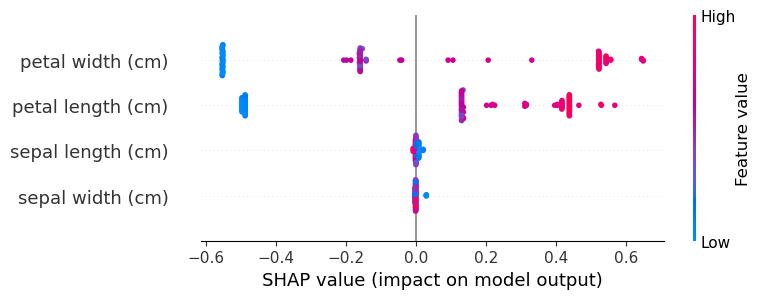

In [44]:
shap.summary_plot(shap_train, X_train)

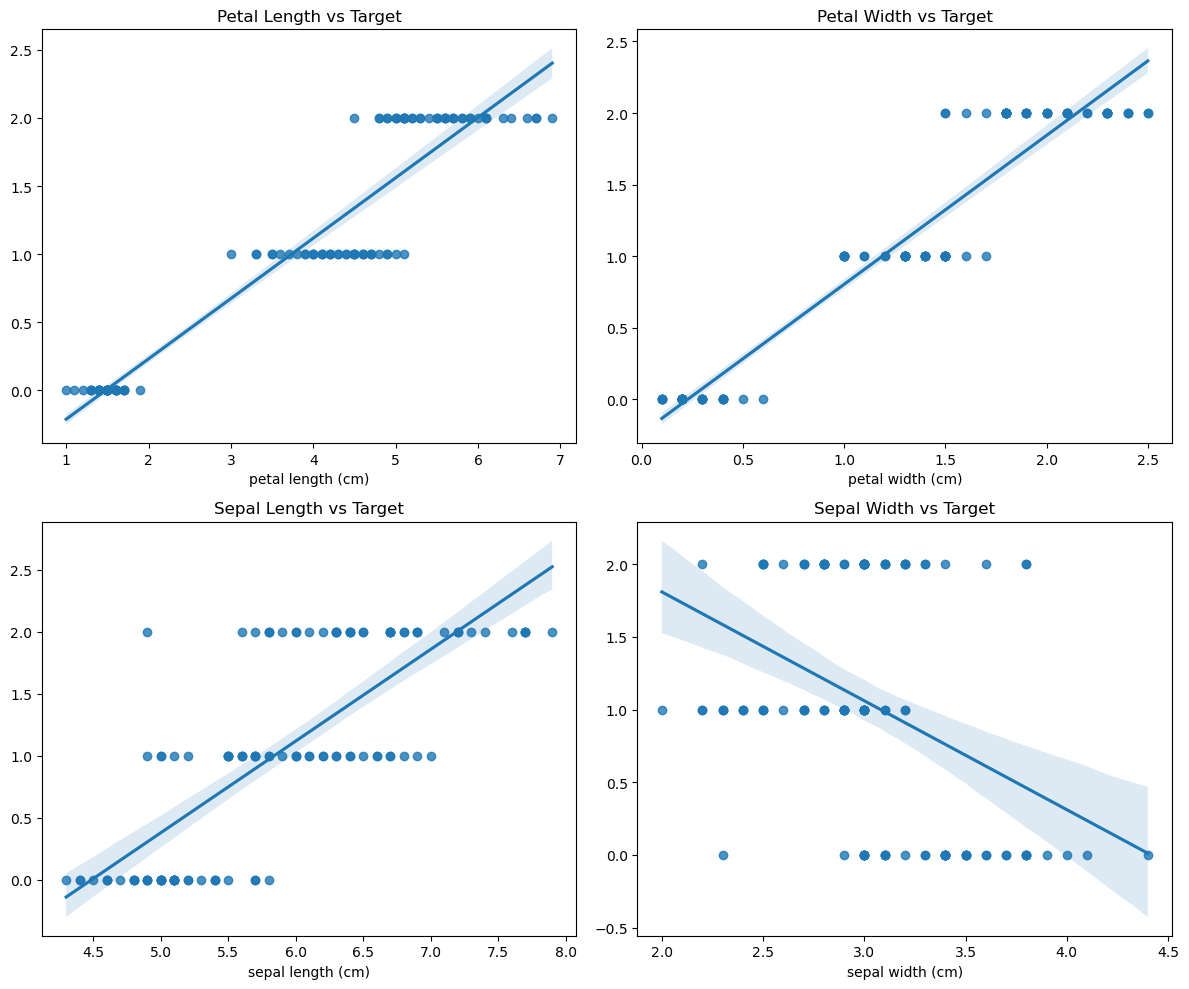

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 첫 번째 서브플롯
sns.regplot(x=X_train["petal length (cm)"], y=y_train, ax=axes[0, 0])
axes[0, 0].set_title("Petal Length vs Target")

# 두 번째 서브플롯
sns.regplot(x=X_train["petal width (cm)"], y=y_train, ax=axes[0, 1])
axes[0, 1].set_title("Petal Width vs Target")

# 세 번째 서브플롯
sns.regplot(x=X_train["sepal length (cm)"], y=y_train, ax=axes[1, 0])
axes[1, 0].set_title("Sepal Length vs Target")

# 네 번째 서브플롯
sns.regplot(x=X_train["sepal width (cm)"], y=y_train, ax=axes[1, 1])
axes[1, 1].set_title("Sepal Width vs Target")

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [46]:
interaction = explainer.shap_interaction_values(X_train)

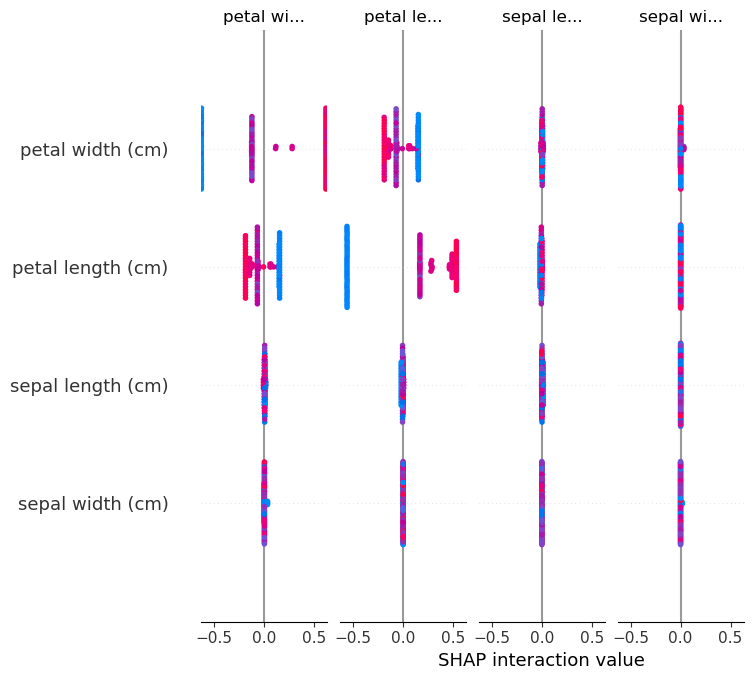

In [47]:
shap.summary_plot(interaction, X_train)

In [48]:
shap.force_plot(
    explainer.expected_value,
    shap_train[0],
    features=X_train.iloc[0],
    feature_names=X_train.columns,
)

In [49]:
shap.force_plot(
    explainer.expected_value,
    shap_train[2],
    features=X_train.iloc[2],
    feature_names=X_train.columns,
)

In [50]:
shap.force_plot(
    explainer.expected_value,
    shap_train[4],
    features=X_train.iloc[4],
    feature_names=X_train.columns,
)

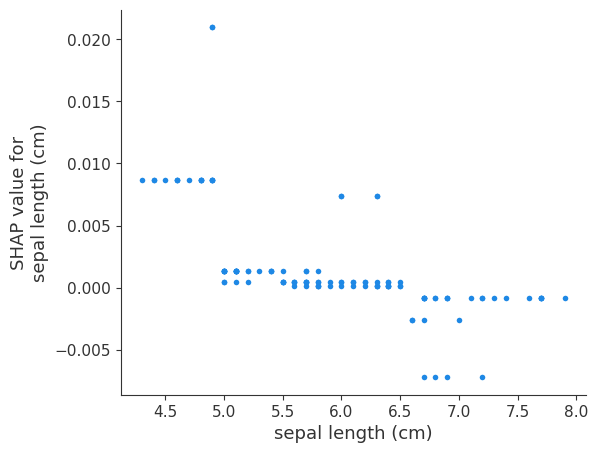

In [51]:
shap.dependence_plot("sepal length (cm)", shap_train, X_train, interaction_index=None)

In [52]:
y_train

array([0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0,
       2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 2, 0, 2, 2, 2, 0])

LIME